In [15]:
import wandb
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyprojroot import here
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, mean_squared_error
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, f1_score, classification_report
import optuna

In [16]:
#Loading datasets
raw_data = pd.read_csv(here('data/raw/ai4i2020.csv'))
X_train = pd.read_csv(here('data/processed/X_train_scaled.csv'))
print(X_train.shape)
y_train = pd.read_csv(here('data/processed/Y_train.csv'))
print(y_train.shape)


X_val = pd.read_csv(here('data/processed/X_val_scaled.csv'))
print(X_val.shape)
y_val = pd.read_csv(here('data/processed/Y_val.csv'))
print(y_val.shape)

(7499, 6)
(7499, 6)
(1501, 6)
(1501, 6)


Text(0.5, 1.0, 'X_train Scaled Data')

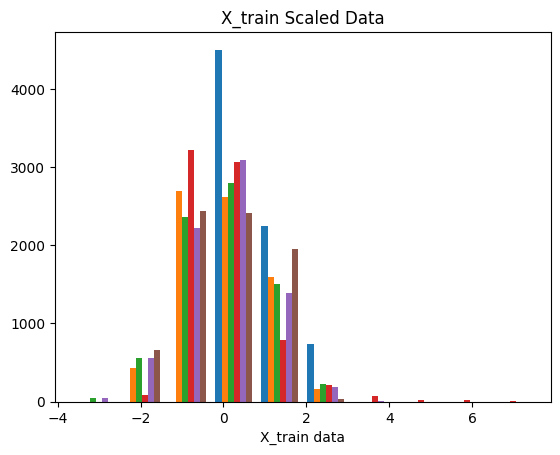

In [17]:
#Doing some exploration
#Making sure data is scaled on training data
plt.hist(X_train);
plt.xlabel('X_train data')
plt.title('X_train Scaled Data')



In [18]:
X_train.head()

,quality_variation,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,0,-0.998835,-1.149025,-0.359382,0.256796,-0.016174
1,0,0.247930,0.333286,-0.912986,0.738238,-0.817033
2,1,0.497283,0.468042,-0.248661,0.808448,0.580544
3,0,0.397542,0.468042,-0.425815,0.276856,1.020231
4,1,2.043272,2.152486,0.266191,0.106346,0.329294


In [19]:
raw_data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [20]:
base_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=3,
    max_features="sqrt",
    n_jobs=-1,
    random_state=7,
)
clf = OneVsRestClassifier(base_rf).fit(X_train, y_train)

In [21]:
class_names = y_train.columns
# probabilities
P_train = clf.predict_proba(X_train)
P_val   = clf.predict_proba(X_val)

# default threshold 0.5
y_val_hat = (P_val >= 0.5).astype(int)

# F1 and per-class report on VAL
print("F1 (micro):  ", f1_score(y_val, y_val_hat, average="micro"))
print("F1 (macro):  ", f1_score(y_val, y_val_hat, average="macro"))
print("F1 (samples):", f1_score(y_val, y_val_hat, average="samples"))
print(classification_report(y_val, y_val_hat, target_names=class_names, zero_division=0, digits=4))





F1 (micro):   0.5974025974025974
F1 (macro):   0.43757575757575756
F1 (samples): 0.015189873417721517
                 precision    recall  f1-score   support

Machine failure     0.9200    0.4600    0.6133        50
            TWF     0.0000    0.0000    0.0000         7
            HDF     1.0000    0.5000    0.6667        18
            PWF     0.8000    0.8000    0.8000        10
            OSF     1.0000    0.3750    0.5455        16
            RNF     0.0000    0.0000    0.0000         3

      micro avg     0.9200    0.4423    0.5974       104
      macro avg     0.6200    0.3558    0.4376       104
   weighted avg     0.8462    0.4423    0.5711       104
    samples avg     0.0158    0.0150    0.0152       104



/Users/jubacochran/projects/student/207/w207-predictive-maintenance/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
